### Import libraries and load datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Load datasets

In [3]:
game_info_df = pd.read_csv('../dataSources/videoGames/metacritic_game_info.csv')
ratingsAndReleaseDate = pd.read_csv('../dataSources/videoGames/updatedVGOutput.csv')
all_games_df = pd.read_excel('../dataSources/videoGames/metascore-video-games-1986-2023.xlsx', sheet_name='Sheet1')
sales_df = pd.read_excel('../dataSources/videoGames/Video game sales - 2000 - 2020.xlsx', sheet_name= 'Sheet1')


userComments1 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (0-100k).csv')
userComments2 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (100-200k).csv')
userComments3 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (200-300k).csv')


C:\Users\Admin\AppData\Local\Temp\ipykernel_13112\2694522712.py:7: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments1 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (0-100k).csv')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13112\2694522712.py:8: DtypeWarning: Columns (1,2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  userComments2 = pd.read_csv('../dataSources/videoGames/metacritic_game_user_comments (100-200k).csv')


In [4]:
print(game_info_df.info())
print(game_info_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5000 non-null   int64 
 1   Title          5000 non-null   object
 2   Year           5000 non-null   object
 3   Developer      5000 non-null   object
 4   Genre          5000 non-null   object
 5   Platform       5000 non-null   object
 6   Metascore      5000 non-null   object
 7   Avg_Userscore  5000 non-null   object
 8   No_Players     4993 non-null   object
 9   Platform1      5000 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB
None
   Unnamed: 0                         Title  Year  \
0        3145  007  The World is not Enough  2000   
1        2589             10 Second Ninja X  2016   
2        4465                   1001 Spikes  2014   
3        3896                     1701 A.D.  2006   
4        3716  1979 Revolution Black Friday  2016   

 

In [5]:
print(userComments1.info())
print(userComments1.head())
print(userComments2.info())
print(userComments2.head())
print(userComments3.info())
print(userComments3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280996 entries, 0 to 280995
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100001 non-null  float64
 1   Title       100001 non-null  object 
 2   Platform    100001 non-null  object 
 3   Userscore   100001 non-null  float64
 4   Comment     99999 non-null   object 
 5   Username    100001 non-null  object 
dtypes: float64(2), object(4)
memory usage: 12.9+ MB
None
   Unnamed: 0                                 Title    Platform  Userscore  \
0         0.0  The Legend of Zelda: Ocarina of Time  Nintendo64       10.0   
1         1.0  The Legend of Zelda: Ocarina of Time  Nintendo64       10.0   
2         2.0  The Legend of Zelda: Ocarina of Time  Nintendo64       10.0   
3         3.0  The Legend of Zelda: Ocarina of Time  Nintendo64       10.0   
4         4.0  The Legend of Zelda: Ocarina of Time  Nintendo64       10.0   

                           

In [6]:
print("\nMissing Values:")
print(game_info_df.isnull().sum())
print(all_games_df.isnull().sum())
print(sales_df.isnull().sum())

print(userComments1.isnull().sum())
print(userComments2.isnull().sum())
print(userComments3.isnull().sum())



Missing Values:
Unnamed: 0       0
Title            0
Year             0
Developer        0
Genre            0
Platform         0
Metascore        0
Avg_Userscore    0
No_Players       7
Platform1        0
dtype: int64
no                   0
name                 0
platform             0
platform1        20516
release_date         0
user_score       97027
meta_score      101928
summary          16679
dtype: int64
title                   0
platform                0
genre                   0
publisher               0
vg_score                0
critic_score            0
user_score              0
total_shipped           0
aisan_sales             0
north_american_sales    0
japan_sales             0
european_sales          0
global_sales            0
Production Cost         0
release_year            0
dtype: int64
Unnamed: 0    180995
Title         180995
Platform      180995
Userscore     180995
Comment       180997
Username      180995
dtype: int64
Unnamed: 0    80995
Title         80995
P

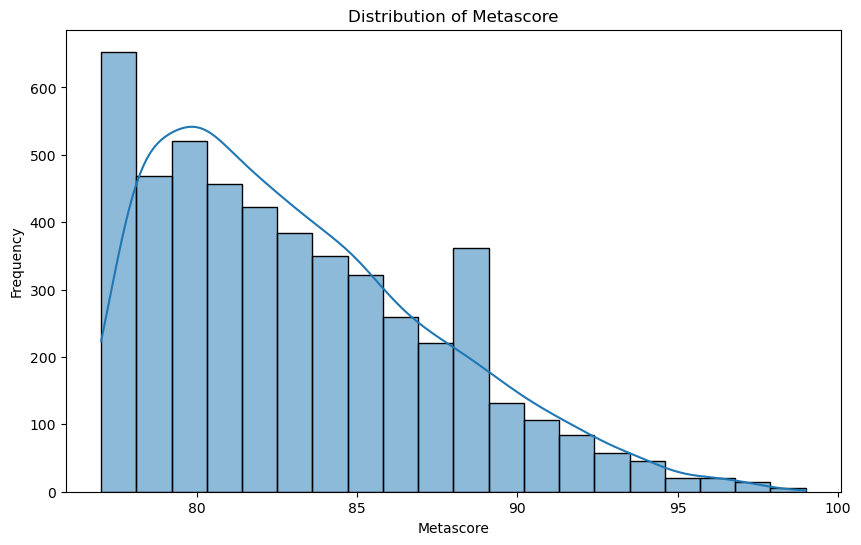

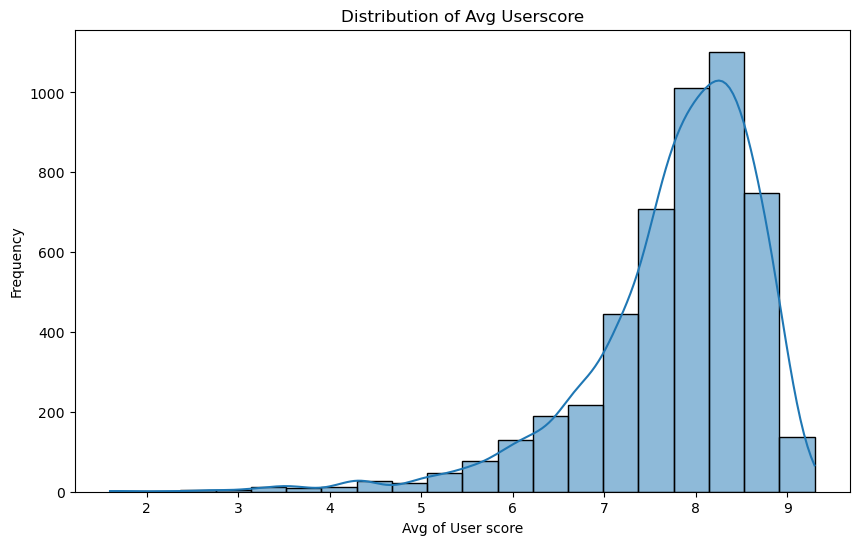

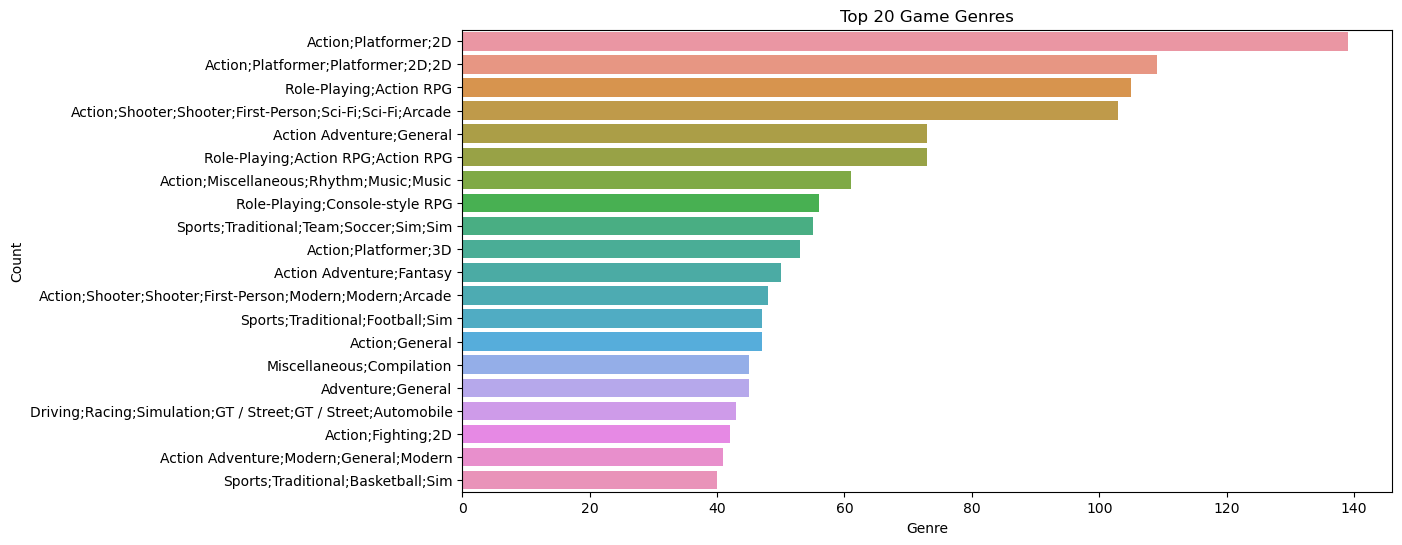


Summary for Metascore:
count    4906.000000
mean       83.171219
std         4.348015
min        77.000000
25%        80.000000
50%        82.000000
75%        86.000000
max        99.000000
Name: Metascore, dtype: float64


In [18]:
#Data Cleaning 
#drop NA
game_info_df.dropna(inplace=True)
#user_comments_df.dropna(inplace=True)
#all_games_df.dropna(inplace=True)
#drop tbd and not specified

game_info_df = game_info_df[(game_info_df['Metascore'] != 'tbd') & (game_info_df['Avg_Userscore'] != 'tbd')]
game_info_df = game_info_df[(game_info_df['Metascore'] != 'not specified') & (game_info_df['Avg_Userscore'] != 'not specified')]

game_info_df['Metascore'] = pd.to_numeric(game_info_df['Metascore'])
game_info_df['Avg_Userscore'] = pd.to_numeric(game_info_df['Avg_Userscore'])


#Data Visualization
# histogram for Metascore
plt.figure(figsize=(10, 6))
sns.histplot(game_info_df['Metascore'], bins=20, kde=True)
plt.title('Distribution of Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(game_info_df['Avg_Userscore'], bins=20, kde=True)
plt.title('Distribution of Avg Userscore')
plt.xlabel('Avg of User score')
plt.ylabel('Frequency')
plt.show()

genre_counts = game_info_df['Genre'].value_counts()
top_20_genres = genre_counts.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_genres.values, y=top_20_genres.index)
plt.title('Top 20 Game Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

#Summary Statistics
metascore_summary = game_info_df['Metascore'].describe()
print("\nSummary for Metascore:")
print(metascore_summary)

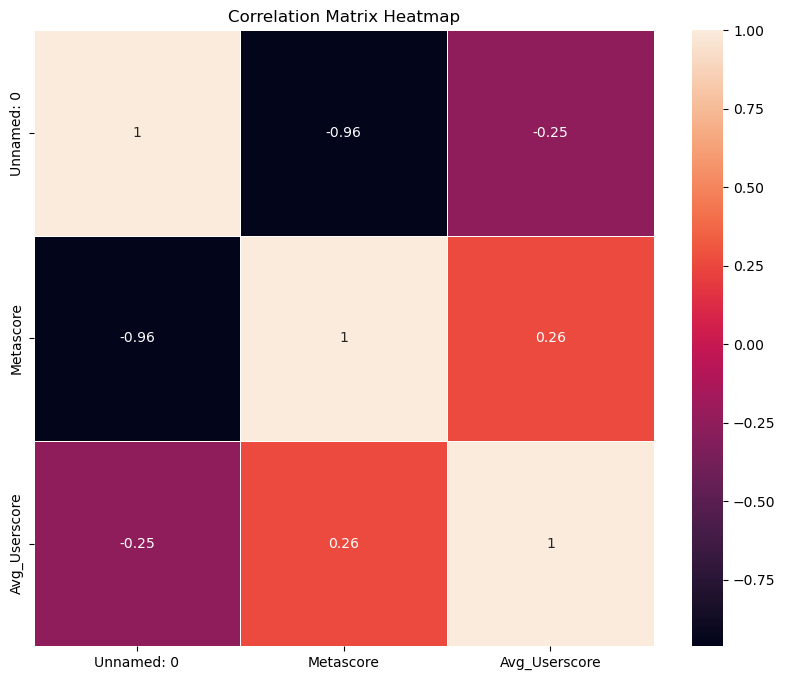

In [17]:
correlation_matrix = game_info_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

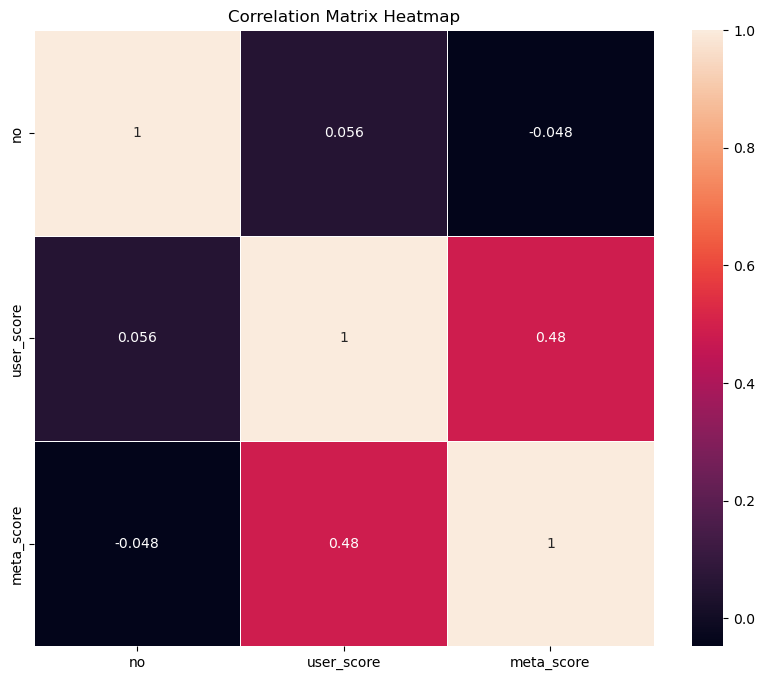

In [16]:
correlation_matrix = all_games_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Sales Dataset

In [19]:
missing_data = sales_df.isnull().sum()
print("Missing data:\n", missing_data)

#no missing data

Missing data:
 title                   0
platform                0
genre                   0
publisher               0
vg_score                0
critic_score            0
user_score              0
total_shipped           0
aisan_sales             0
north_american_sales    0
japan_sales             0
european_sales          0
global_sales            0
Production Cost         0
release_year            0
dtype: int64


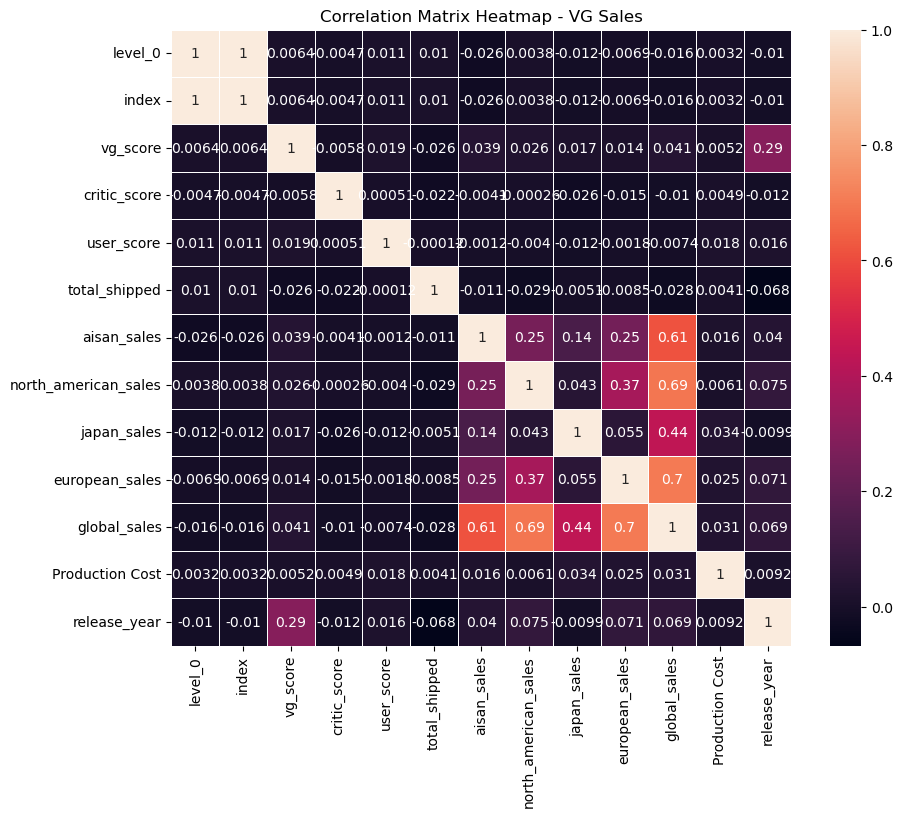

In [28]:
correlation_matrix = sales_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  linewidths=0.5)
plt.title('Correlation Matrix Heatmap - VG Sales')
plt.show()

In [32]:
target_variable = 'global_sales'  # Replace with your target variable
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)
print(f"Top correlated variables with '{target_variable}':")
print(correlation_with_target)


Top correlated variables with 'global_sales':
global_sales            1.000000
european_sales          0.703878
north_american_sales    0.692560
aisan_sales             0.613336
japan_sales             0.435208
release_year            0.069332
vg_score                0.040766
Production Cost         0.030840
user_score             -0.007421
critic_score           -0.010045
level_0                -0.015896
index                  -0.015896
total_shipped          -0.027605
Name: global_sales, dtype: float64


In [34]:
#VIF check
from statsmodels.stats.outliers_influence import variance_inflation_factor

independent_variables = ['vg_score', 'user_score', 'total_shipped','critic_score','Production Cost']  
X = sales_df[independent_variables]

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print or inspect the VIF values
print(vif_data)

          Variable       VIF
0         vg_score  4.419470
1       user_score  3.905887
2    total_shipped  3.104694
3     critic_score  4.054562
4  Production Cost  4.114673


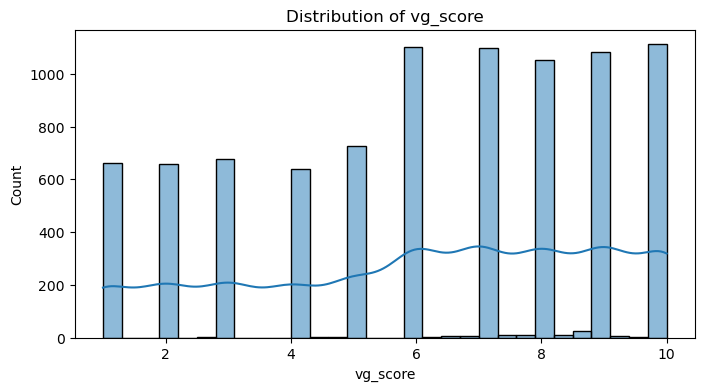

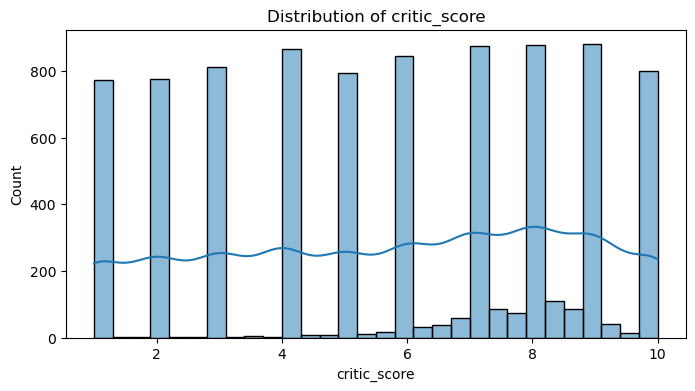

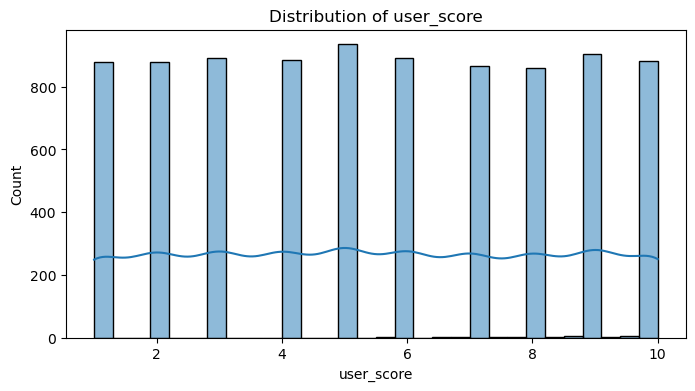

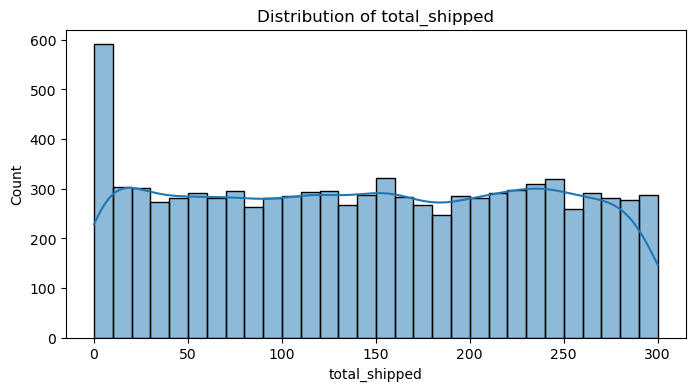

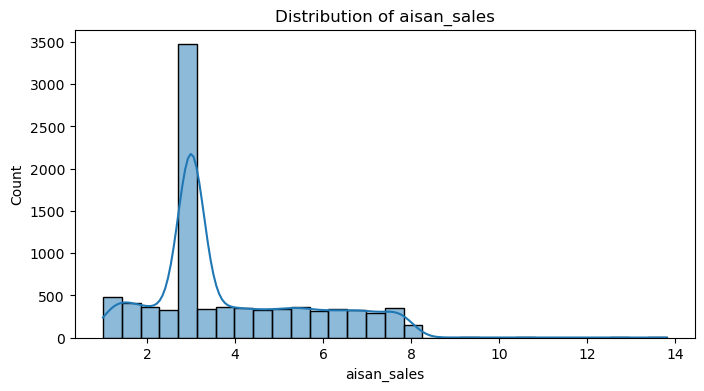

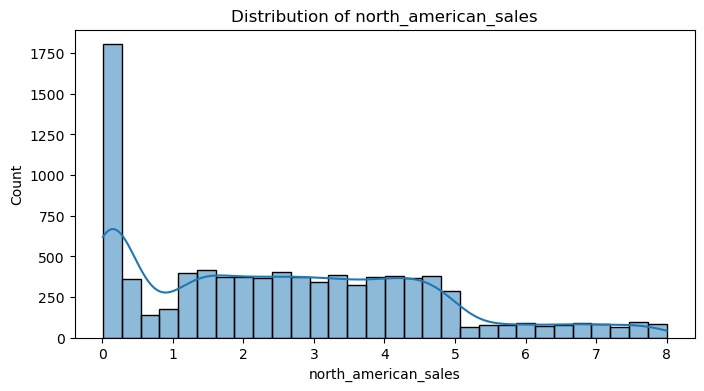

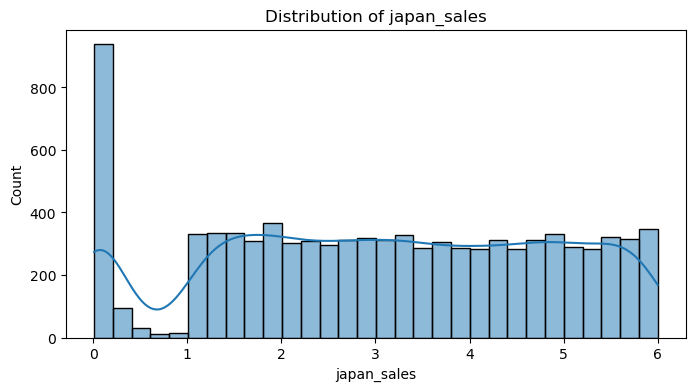

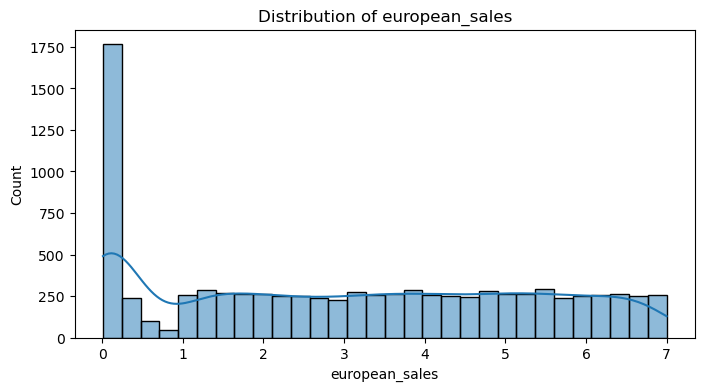

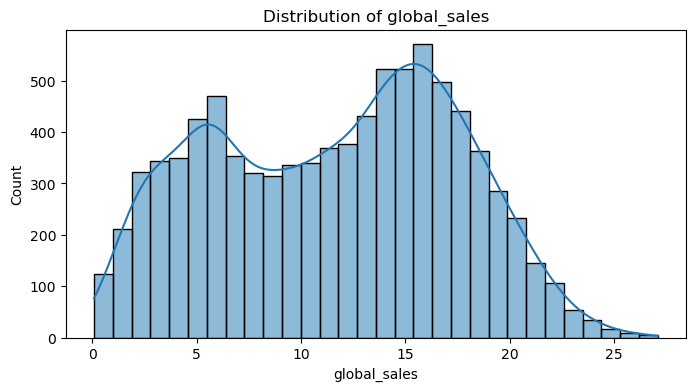

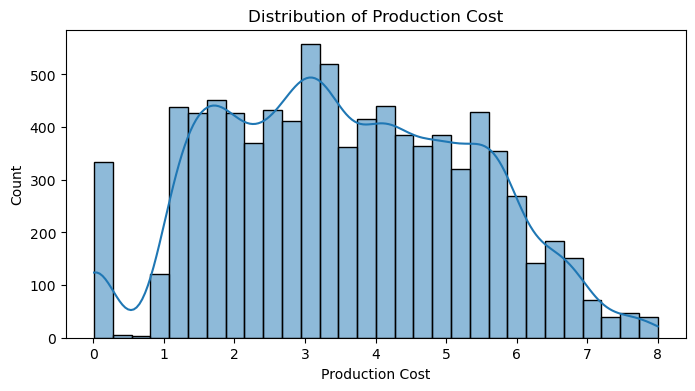

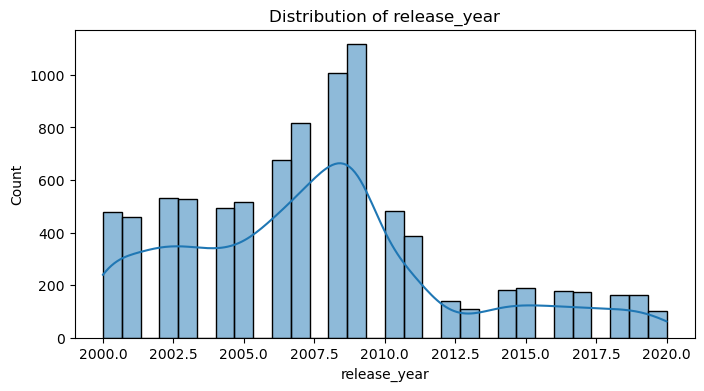

In [24]:
summary_stats = sales_df.describe()

# Distribution of numeric variables
numeric_columns = sales_df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(sales_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()